In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitutils as ft
import scipy.optimize as opt
import fitutils as ft
import tools
import near0_nonlinear_analysis 
import constants as cnt
import near0_quadra_nonlinear
import near0_linear_analysis
import schottky_analysis as sch
import polynomial_fit as pol
import debye_integration as db

## I. Fit direct

Optimisation de la courbe $C/T(T²)$, (en $mJ.mol^{-1}.K^{-1})$. 

Fit selon le modèle $\frac{C}{T}(x)$ = $\beta x$ + $\gamma$ + $Cs(x)$, $x = T²$, avec $Cs$ la contribution de Schttoky

Résultats peu satisfaisants après 15 K

Beta, Gamma, n, E :  0.5975980634783241 8.616475379830913e-09 0.010175506175793127 9.000007077294152e-23


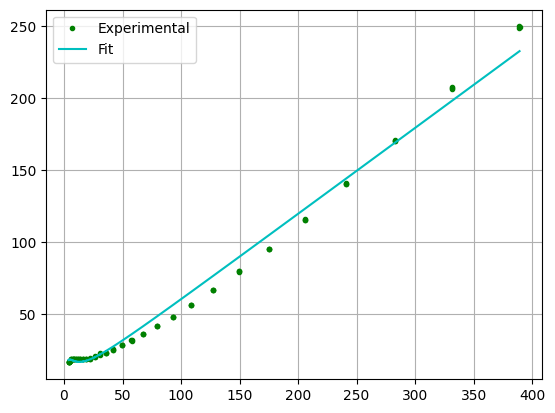

In [2]:
# Non linear fit between 0 K and 20 K

near0_nonlinear_analysis.plot_fit(0,400, cnt.squared_temperature, cnt.C_div_T, cnt.err_sample_HC, bounds= ([0.1, 0, 1e-3, 9e-23],[1, 10, 5e-2, 1.2e-22]))

Beta, Gamma, n, E :  0.4858077222518549 1.5992556105939442 0.010999999999999302 1.1043272257500458e-22


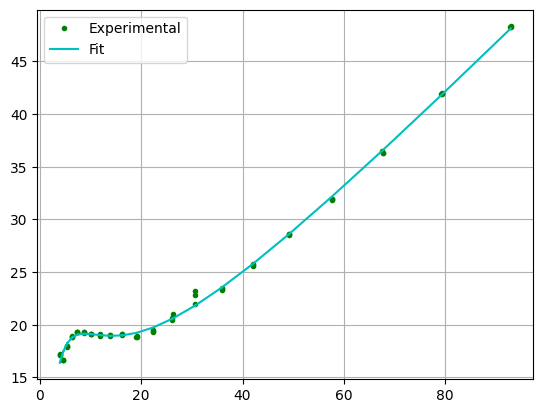

In [3]:
# Non linear fit between 0 K and 10 K

near0_nonlinear_analysis.plot_fit(0,100, cnt.squared_temperature, cnt.C_div_T, cnt.err_sample_HC)

## II. Linear fit

Soustraction de la contribution et ajustement avec une fonction linéaire selon le modèle $\frac{C}{T}(x)$ = $\beta x$ + $\gamma$. Les données sont ajustées avec la méthode des moindres carrés et de Monte Carlo pour les incertitudes. 

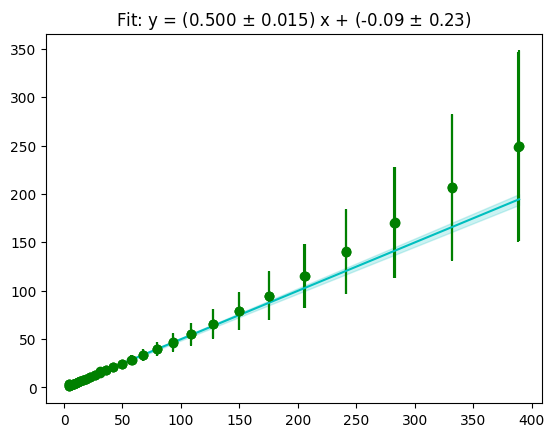

array([ 0.49977051, -0.08534993,  0.01460401,  0.22612234])

In [4]:
# Linear fit between 0 and 20 K
# With the curve fit values of E and n
#near0_linear_analysis.final(0, 400, cnt.E_curve_fit, cnt.n_curve_fit,cnt.temperature, cnt.squared_temperature, cnt.C_div_T)
near0_linear_analysis.final(0, 400, cnt.E_quadratic, cnt.n_quadratic,cnt.temperature, cnt.squared_temperature, cnt.C_div_T)
#near0_linear_analysis.final(0, 400, cnt.E_exp_10, cnt.n_curve_fit,cnt.temperature, cnt.squared_temperature, cnt.C_div_T)

## III. Polynomial fit


Soustraction de la contribution de Schottky et ajustement avec un polynôme de dergré 2. Ajustement ave la méthode des moindres carrés et np.least_squares. 

Ajustement visuellement satisfaisant, $\gamma$ proche de 0 et $\beta = 0.468 mJ/K^4/mol$

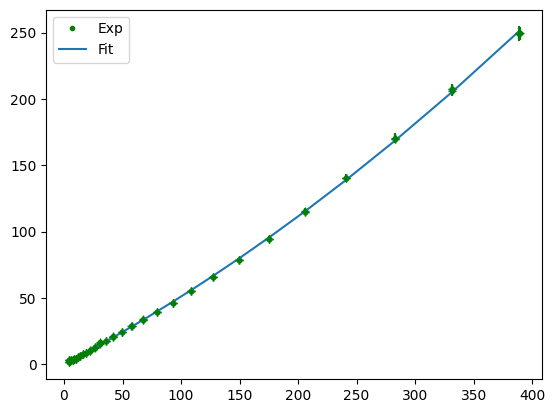

alpha, beta, gamma :  [0.00046898 0.46303904 0.10019545]


In [15]:
# With  polyfit : deg=2

#print("alpha, beta, gamma : ", 
      #pol.poly_fit(0, 20, cnt.temperature, cnt.squared_temperature, cnt.C_div_T, cnt.err_C_divT, cnt.E_curve_fit, cnt.n_curve_fit, deg=2))
print("alpha, beta, gamma : ", 
      pol.poly_fit(0, 20, cnt.temperature, cnt.squared_temperature, cnt.C_div_T, cnt.err_C_divT, cnt.E_quadratic, cnt.n_quadratic, deg=2))


## IV. Quadratic fit

Fit quadratique direct avec les valeurs entre 0 et 20 K, utilisation de curve fit de scipy. 

Les valeurs obtenues sont similaires à celles obtenues avec l'ajustement polynomial. 

Beta, Gamma, n, E, alpha :  0.46030142536734425 0.3978193675518903 0.012668048215898177 1.153902897249821e-22 0.00047452677198764565


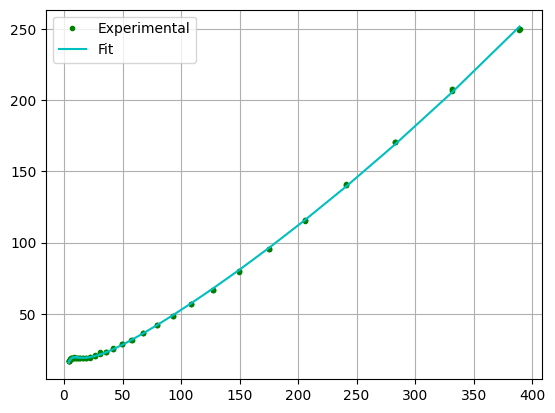

In [6]:
# Between 0 and 20 K

near0_quadra_nonlinear.plot_fit_quadra(0, 400, cnt.squared_temperature, cnt.C_div_T, ([0.1, 0, 1e-3, 9.5e-23, -1 ], [0.7, 5, 2e-2, 1.5e-22, 1]))

## V. Température de Debye

Température de Debye calculée pour un $\beta$ de $0.468$. 

Résultat : $T_{D} = 380 K$

In [7]:
# With the linear fit 

def debye_temp(beta_exp, temperature) :
    debye_temp = []
    for val in temperature : 
        debye_temp.append(db.debye_temperature_integration(beta_exp, val)[0])
    return np.mean(debye_temp)

temperature_bounded, C_div_t_bounded = tools.tab_interval(cnt.temperature, cnt.C_div_T, 0, 20)


print(db.debye_temperature_integration(0.46030142536734425e-3, 20), cnt.debye_temperature(0.46030142536734425))

(380.05, 0.0004602997189397482) 380.0539637204407
